### Import required packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cntk
from cntk import Trainer, learning_rate_schedule, UnitType
from cntk.learners import sgd
from cntk.layers import default_options, Dense

### Parameters

In [2]:
# Training parameters.
num_samples = 500
initial_learning_rate = 0.001
num_samples_to_train = 400
num_iterations = 400
batch_size = 25


# Network has only one output which is its prediction.
input_dim = 1
num_outputs = 1
num_minibatches_to_train = int(num_samples_to_train / batch_size)

### Arbitrary Data Creation

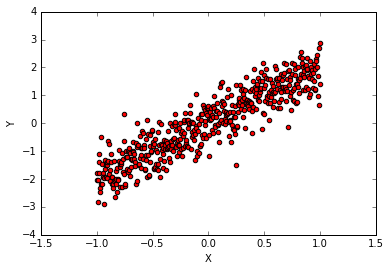

In [3]:
# random data
features = np.linspace(-1, 1, num_samples)
predictions = 2 * features + np.random.randn(*features.shape) * 0.5

# Plotting the scatter plot
plt.scatter(features, predictions, c='r')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# adding one dimension for further processing. Input must be formatted as (batch_size,1).
features = features[:,None]
predictions = predictions[:,None]

### Network

In [4]:
# Output is a single node with a linear operation.
input = cntk.input_variable(input_dim)
label = cntk.input_variable(num_outputs)
pred = Dense(num_outputs)(input)

### Loss

In [5]:
# Defining loss function and evaluation metric
loss = cntk.squared_error(pred, label)
eval_fun = cntk.squared_error(pred, label)

### Training 

In [6]:
# Instantiate the trainer object to drive the model training
learning_rate = learning_rate_schedule(initial_learning_rate, UnitType.minibatch)
optimizer_op = sgd(pred.parameters, learning_rate)
train_op = Trainer(pred, (loss, eval_fun), [optimizer_op])

for step in range(0, num_iterations):
    for batch_num in range(0, num_minibatches_to_train):
        batch_features = features[(batch_num * batch_size):(batch_num * batch_size + batch_size), :]
        batch_labels = predictions[(batch_num * batch_size):(batch_num * batch_size + batch_size), :]
        train_op.train_minibatch({input: batch_features, label: batch_labels})
        training_loss = train_op.previous_minibatch_loss_average
        eval_value = train_op.previous_minibatch_evaluation_average
    if (step+1) % 10 == 0:
        print("Iteration: {0}, Loss: {1:.2f}".format(step+1, training_loss))

/home/sina/anaconda/envs/cntk-py35/lib/python3.5/site-packages/cntk/core.py:351: UserWarning: your data is of type "float64", but your input variable (uid "Input3") expects "<class 'numpy.float32'>". Please convert your data beforehand to speed up training.
  (sample.dtype, var.uid, str(var.dtype)))
/home/sina/anaconda/envs/cntk-py35/lib/python3.5/site-packages/cntk/core.py:351: UserWarning: your data is of type "float64", but your input variable (uid "Input4") expects "<class 'numpy.float32'>". Please convert your data beforehand to speed up training.
  (sample.dtype, var.uid, str(var.dtype)))


Iteration: 10, Loss: 3.72
Iteration: 20, Loss: 3.64
Iteration: 30, Loss: 3.47
Iteration: 40, Loss: 3.24
Iteration: 50, Loss: 2.98
Iteration: 60, Loss: 2.72
Iteration: 70, Loss: 2.46
Iteration: 80, Loss: 2.22
Iteration: 90, Loss: 2.00
Iteration: 100, Loss: 1.79
Iteration: 110, Loss: 1.60
Iteration: 120, Loss: 1.44
Iteration: 130, Loss: 1.29
Iteration: 140, Loss: 1.16
Iteration: 150, Loss: 1.04
Iteration: 160, Loss: 0.94
Iteration: 170, Loss: 0.85
Iteration: 180, Loss: 0.77
Iteration: 190, Loss: 0.70
Iteration: 200, Loss: 0.63
Iteration: 210, Loss: 0.58
Iteration: 220, Loss: 0.53
Iteration: 230, Loss: 0.49
Iteration: 240, Loss: 0.45
Iteration: 250, Loss: 0.42
Iteration: 260, Loss: 0.39
Iteration: 270, Loss: 0.37
Iteration: 280, Loss: 0.35
Iteration: 290, Loss: 0.33
Iteration: 300, Loss: 0.31
Iteration: 310, Loss: 0.30
Iteration: 320, Loss: 0.28
Iteration: 330, Loss: 0.27
Iteration: 340, Loss: 0.26
Iteration: 350, Loss: 0.26
Iteration: 360, Loss: 0.25
Iteration: 370, Loss: 0.24
Iteration:

### Model Evaluation

In [7]:
# Test data
test_features = features[num_samples_to_train:num_samples, :]
test_labels = predictions[num_samples_to_train:num_samples, :]

# Train data
train_features = features[0:num_samples_to_train, :]
train_labels = predictions[0:num_samples_to_train, :]

# Print out our weight and bias
print("Trained parameters are: w= {0:.2f}, b={1:.2f}".format(pred.W.value[0][0], pred.b.value[0]))

Trained parameters are: w= 1.80, b=-0.01


### Plot

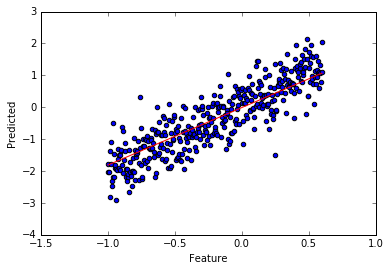

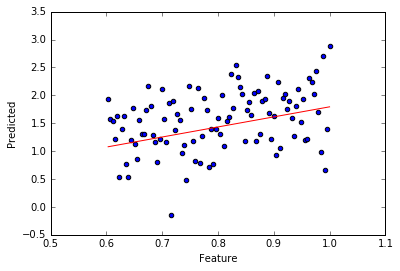

In [8]:
# Evaluation of training set
plt.scatter(train_features[:,0], train_labels[:,0], c='b')
X = train_features[:,0]
Y = pred.W.value[0] * train_features[:,0] + pred.b.value[0]
plt.plot(X, Y, 'r')
plt.xlabel("Feature")
plt.ylabel("Predicted")
plt.show()

# Evaluation on test set
plt.scatter(test_features[:,0], test_labels[:,0], c='b')
X = test_features[:,0]
Y = pred.W.value[0] * test_features[:,0] + pred.b.value[0]
plt.plot(X, Y, 'r')
plt.xlabel("Feature")
plt.ylabel("Predicted")
plt.show()